In [277]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [278]:
#import csv_file
df = pd.read_csv('Resources/crime_data_2016_2017_2018.csv', parse_dates = ['TIME OCC'])
df

,DR_NO,Date Rptd,DATE OCC,Day,Time,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,year,Category
0,160210879,5/17/2016 0:00,5/12/2016 0:00,Thursday,14:00,1400,2,Rampart,249,2,...,662.0,NaN,NaN,NaN,4TH,BEAUDRY,34.0555,-118.2576,2016,THEFT
1,160105785,1/22/2016 0:00,1/22/2016 0:00,Friday,5:00,530,1,Central,195,1,...,510.0,NaN,NaN,NaN,200 E WASHINGTON BL,NaN,34.0335,-118.2619,2016,THEFT
2,161111981,6/16/2016 0:00,6/15/2016 0:00,Wednesday,18:30,1830,11,Northeast,1128,1,...,510.0,NaN,NaN,NaN,900 N AVENUE 64,NaN,34.1225,-118.1818,2016,THEFT
3,160406527,2/28/2016 0:00,2/28/2016 0:00,Sunday,20:00,200,4,Hollenbeck,438,1,...,510.0,NaN,NaN,NaN,LOMBARDY,KIMBALL,34.0766,-118.1765,2016,THEFT
4,161821666,11/22/2016 0:00,11/21/2016 0:00,Monday,19:00,1900,18,Southeast,1851,1,...,510.0,NaN,NaN,NaN,700 W EL SEGUNDO BL,NaN,33.9164,-118.2870,2016,THEFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682917,181804617,1/11/2018 0:00,1/6/2018 0:00,Saturday,10:00,100,18,Southeast,1844,1,...,440.0,NaN,NaN,NaN,400 E IMPERIAL HY,NaN,33.9345,-118.2623,2018,THEFT
682918,180708032,3/26/2018 0:00,3/23/2018 0:00,Friday,10:00,1000,7,Wilshire,713,1,...,442.0,NaN,NaN,NaN,400 N FAIRFAX AV,NaN,34.0782,-118.3614,2018,THEFT
682919,181109895,5/3/2018 0:00,3/23/2018 0:00,Friday,12:00,1200,11,Northeast,1113,2,...,649.0,NaN,NaN,NaN,2400 COLORADO BL,NaN,34.1400,-118.2190,2018,THEFT
682920,181108488,4/6/2018 0:00,2/24/2018 0:00,Saturday,13:00,130,11,Northeast,1135,2,...,860.0,NaN,NaN,NaN,3900 RODERICK RD,NaN,34.1208,-118.2320,2018,SEX CRIMES


In [279]:
#Check to see if there are problems with the data column name
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'Day', 'Time', 'TIME OCC', 'AREA',
       'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc',
       'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc',
       'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION',
       'Cross Street', 'LAT', 'LON', 'year', 'Category'],
      dtype='object')

In [280]:
 # Calculate the count of crimes by category for 2016 through 2018
df["Category"].value_counts()

THEFT         385533
ASSAULT       140445
OTHER          80388
VANDALISM      65255
SEX CRIMES     11301
Name: Category, dtype: int64

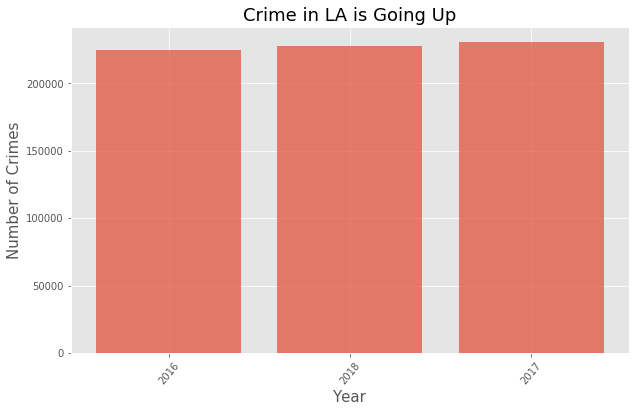

In [260]:
# Notice that crimes in LA in general have been gradually growing every year

mask_year = df['year'] <= 2018
n_crime = df[mask_year]['year'].value_counts().sort_values()

figure = figsize(10,6)
bar(range(n_crime.shape[0]), n_crime, alpha = 0.7)
xticks(range(n_crime.shape[0]), n_crime.index, rotation = '50')
xlabel('Year', size = 15)
ylabel('Number of Crimes', size = 15)
title('Crime in LA is Going Up', size = 18);

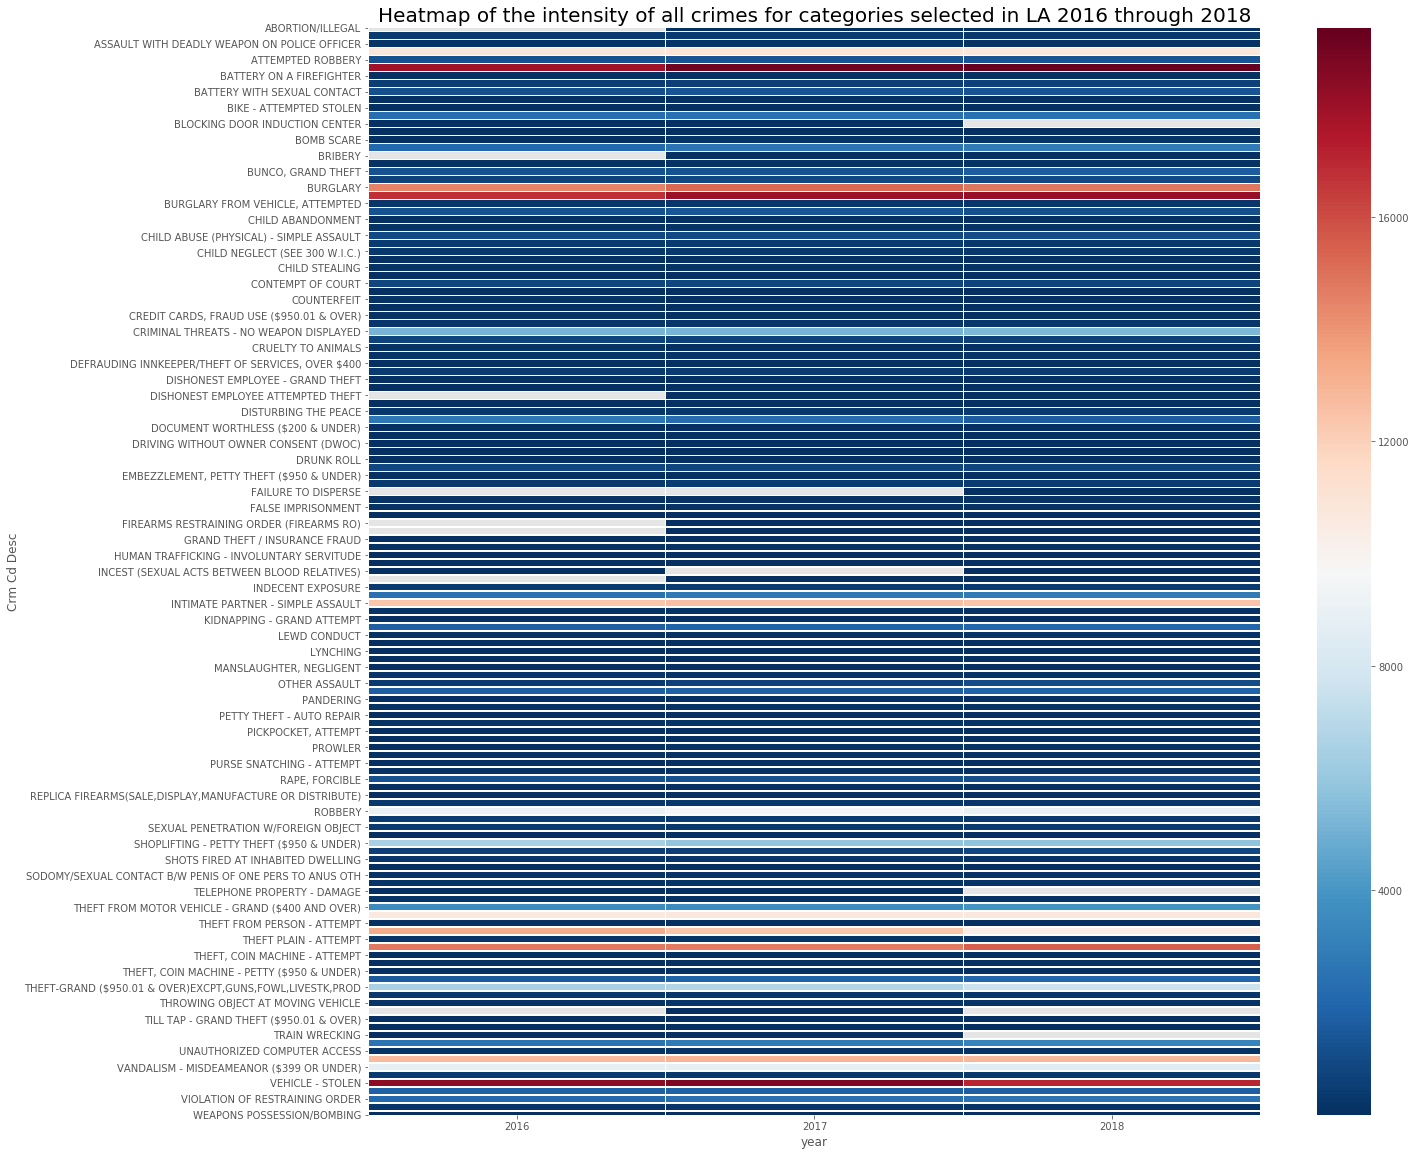

In [290]:
# Using a heatmap, we can visualize which type of crime happens more frequently in LA.
# Notice that theft are among the biggest crimes, with many picking up in intensity during 2017. 

mask_year = df['year'] <= 2018
n_crime = df[mask_year][['Crm Cd Desc','year']]
m = n_crime.groupby(['Crm Cd Desc','year']).apply(lambda x: len(x)).unstack()
figure = figsize(20, 20)

sns.heatmap(m, cmap='RdBu_r', linewidth=0.5);
title('Heatmap of the intensity of all crimes for categories selected in LA 2016 through 2018' , fontsize = 20);

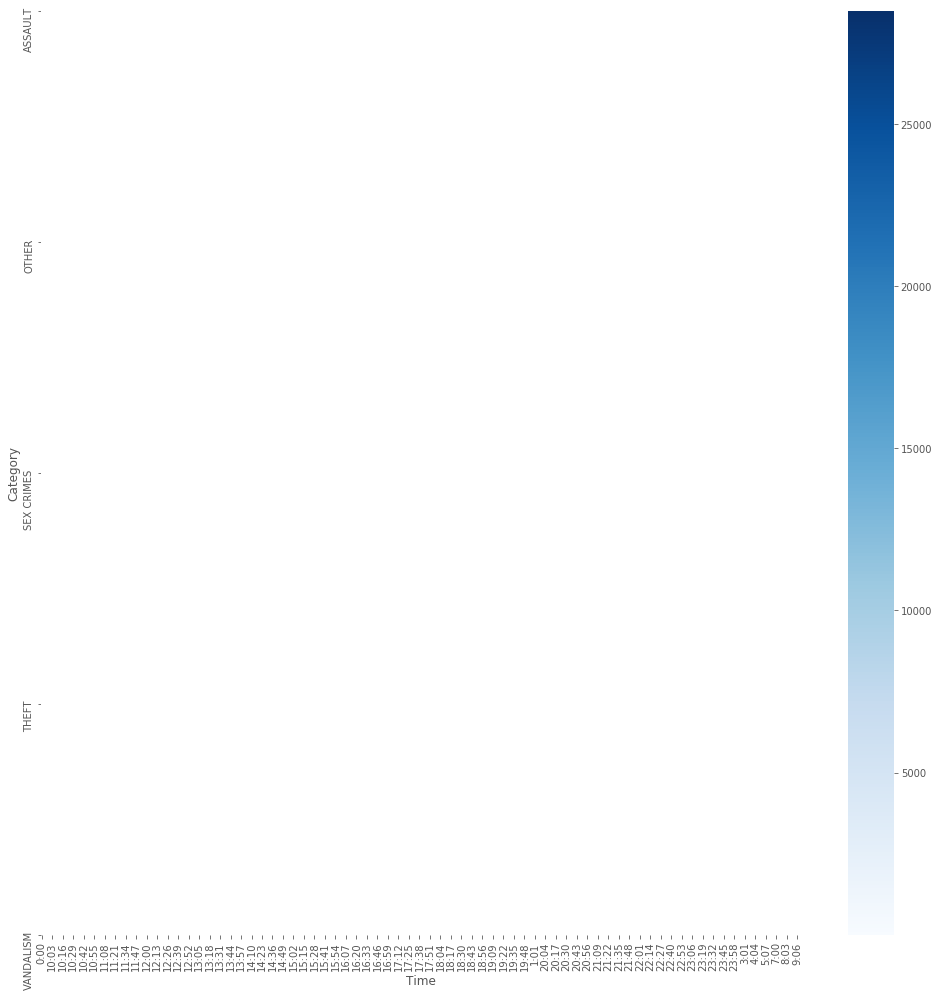

In [281]:
# With heatmap, we can notice some interesting time-related trends. 
# For instance, 12 at noon seems to be the time when all types crimes occur the most,
# which goes against the perception that nighttime is when crimes happen the most. ###Sorry could not figure out the time of day
#In excel I could see noon seems to be a high peak.

def count_rows(x):
    return len(x)

m = df.groupby(['Category','Time']).apply(count_rows).unstack()
figure = figsize(17,17)
sns.heatmap(m, cmap='Blues', linewidth=4.5);

In [163]:
# Now that we've looked at all crimes, let's focus on the top 5.

first_n = 5
print(df['Category'].value_counts(1)[:first_n].sum())

other = 1-df["Category"].value_counts(1)[:first_n].sum()
top_5_crime = df["Category"].value_counts(1)[:first_n].index
print(top_5_crime.values)

0.9999999999999999
['THEFT' 'ASSAULT' 'OTHER' 'VANDALISM' 'SEX CRIMES']


In [266]:
percent = 0.6
df_percent = df['Crm Cd Desc'].value_counts(1).cumsum()<=percent
Crime_Code_Description_most = df_percent[df_percent].index.values

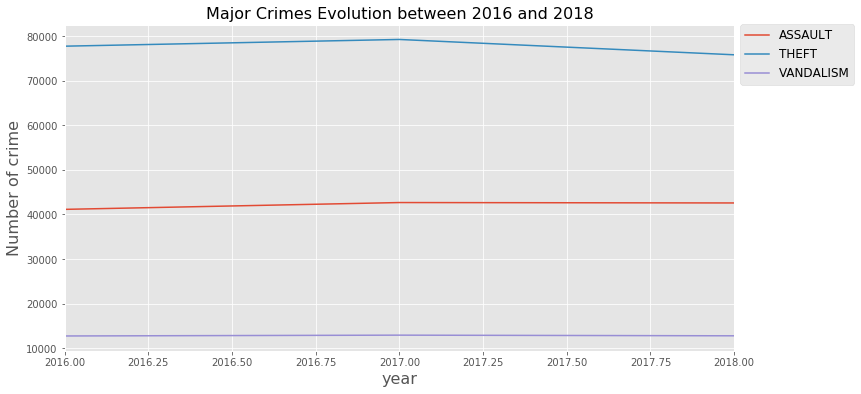

In [267]:
df_index_crime = df.set_index('Crm Cd Desc')
df_most = df_index_crime.loc[Crime_Code_Description_most, :]
df_most.reset_index(inplace=True)

ax = df_most.groupby([ 'year','Category'])[
    'DR_NO'].count().unstack().loc[2016:2018,:].plot(figsize=(12,6))
legend(bbox_to_anchor=(1.0, 1.02), fontsize=12)
title('Major Crimes Evolution between 2016 and 2018', fontsize=16)
ylabel('Number of crime', fontsize=16)
xlabel('year', fontsize=16);

In [229]:
df2 = df.groupby(['Day','Category']).apply(count_rows).unstack()
df2.head()
df2.reset_index(inplace = True)

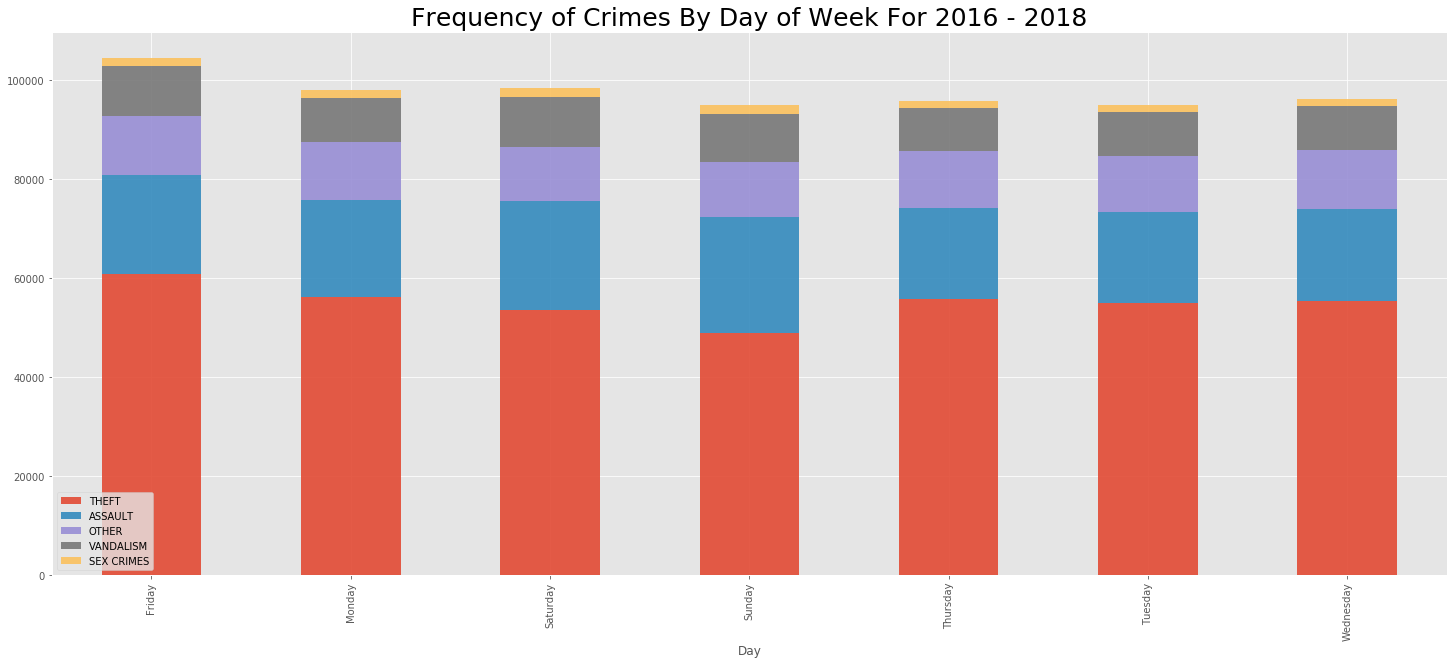

In [300]:
#Crimes by category based on day of week
figure = figsize(25,10) 
df2.plot.bar(x= "Day", y = top_5_crime, stacked = True, alpha = 0.9);
legend();
title('Frequency of Crimes By Day of Week For 2016 - 2018', size = 25);